### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [2]:
data = pd.read_csv('E:\datasets\Train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Preprocessing

In [4]:
#dropping the null values as row
data = data.dropna(axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### spilliting the Data

In [7]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [10]:
train_input.shape

(500, 1)

In [11]:
train_output.shape

(500, 1)

In [13]:
test_input.shape

(199, 1)

In [14]:
test_output.shape

(199, 1)

# LINEAR REGRESSION

## Polynomial regression

### Fitting the data in Polynomial Regression function

In [18]:
# importing packages from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#declaring the x-degree as 2 (Y=θo + θ₁X + θ₂X²)
poly_regressor = PolynomialFeatures(degree=2)

#transforming the training input into polynomial function matrix by applying its value
poly_train_input = poly_regressor.fit_transform(train_input)

#fitting the transformed data to the polyregressor
poly_regressor.fit(poly_train_input,train_output)

PolynomialFeatures()

In [20]:
#with degree 2, having 3 columns for theta,theta1*x1,theta2*x1^2 (Y=θo + θ₁X + θ₂X² + … + θₘXᵐ)
poly_train_input

array([[1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.500e+01, 2.250e+02],
       ...,
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 8.100e+01, 6.561e+03],
       [1.000e+00, 9.700e+01, 9.409e+03]])

### Applying polynomial regressor in Linear Regression

In [22]:
linear_regressor = LinearRegression()

#fitting the tranformed data to the linear regressor
linear_regressor.fit(poly_train_input,train_output)

LinearRegression()

# Predicting Test_input

In [25]:
predicted_value = linear_regressor.predict(poly_regressor.fit_transform(test_input))

In [26]:
predicted_value

array([[ 4.46957573],
       [60.99608394],
       [47.00554813],
       [97.51828372],
       [29.89058614],
       [62.98705348],
       [-0.65061901],
       [99.47374049],
       [17.72593351],
       [29.89058614],
       [97.51828372],
       [15.69177278],
       [21.78849616],
       [55.01165768],
       [42.99097571],
       [74.89255892],
       [90.65906809],
       [46.00262488],
       [84.76102421],
       [55.01165768],
       [35.94699773],
       [49.00995493],
       [93.60161134],
       [42.99097571],
       [21.78849616],
       [36.95472001],
       [23.81689807],
       [94.58149929],
       [60.99608394],
       [74.89255892],
       [67.95607903],
       [58.00603037],
       [ 4.46957573],
       [53.0130097 ],
       [79.83279034],
       [82.79117037],
       [24.83037917],
       [33.93011348],
       [25.84338036],
       [89.67726053],
       [59.99987932],
       [49.00995493],
       [18.74229403],
       [91.64039574],
       [28.87950455],
       [ 7

In [27]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

# Finding the accuracy of the model

In [30]:
from sklearn.metrics import mean_squared_error

In [32]:
error = mean_squared_error(predicted_value,test_output)

In [33]:
error

8.063337564451198

# Plotting the graph

<function matplotlib.pyplot.show(close=None, block=None)>

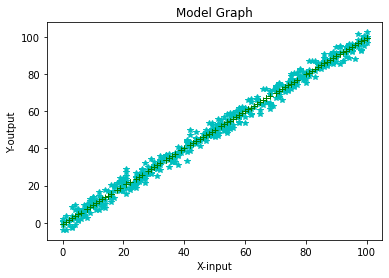

In [35]:
plt.plot(train_input,train_output,'*',color='c')
plt.plot(test_input,predicted_value,'+',color='g')
plt.title('Model Graph')
plt.xlabel('X-input')
plt.ylabel('Y-output')
plt.show